# Multi Layer Perceptron

This exercise gives an implementation of a multi layer perceptron.

Multi layer Perceptron
    - Input layers, output layers and hidden layers.
    - It uses step function as activation function.
    - Delta Learning rule is used to update the weights and bias.

 
Ref: Neural Networks and Deep Learning (deeplearning.ai) by Andrew Ng, Adjunct Professor, Stanford University @ Coursera.


## 1. Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


## 2 - Perceptron model


 ![title](images/MLP.png)
 
**Mathematically**:

For one example $x^{(i)}$:
$$z^{(i)} =  W x^{(i)} + b  \tag{1}$$ 

$$a^{(i)} = activation(z^{(i)})\tag{2}$$

The activation function used in Perceptron is given as:

$$a^{(i)} = \begin{cases} 1 & \mbox{if } z(i) > 0 \\ 0 & \mbox{otherwise } \end{cases}\tag{3}$$
                     

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = \sum\limits_{i = 0}^{m} \left((y^{(i)} - a^{(i)}) * x^{(i)} \right)  \small \tag{3}$$

The updation of parameters is performed using the Perceptron Learning rule as follows:
$$ w = w + \alpha * J \tag{4}$$
$$ b = b + \alpha * J \tag{4}$$

**Methodology**: 

The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Update parameters (Perceptron Learning rule)


### (a) Define the neural network structure

In [2]:
# Define the neural network structure -- layer sizes

def initialize_sizes(X, Y):
    n_x = X.shape[1]
    n_h = X.shape[1] + 1 #  my assumption
    n_y = Y.shape[1]
    size = {'n_x': n_x,
            'n_h': n_h,
            'n_y': n_y}
    return size

### (b) Initialize the model's parameters

In [3]:
# initialize parameters or weights

def initialize_parameter(size):
    n_x = size['n_x']
    n_h = size['n_h']
    n_y = size['n_y']
    W1 = np.random.randn(n_x, n_h) * 0.01
    b1 = np.random.randn(1,n_h) 
    W2 = np.random.randn(n_h, n_y) * 0.01
    b2 = np.random.randn(1,n_y)
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2 }
    return parameters

### (c) Loop:  forward propagation,  Compute loss,  Update parameters

In [4]:
# forward propagation

# z = w*x
# a = activation()
# use heaviside for step function
# cost = sum( (y-a) * x )
# w = w + learning rate * cost


def forward_propagation(X, Y, parameters):
    # loop
    learning_rate = 0.00009
    cost_history = []
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # loop
    for i in range(0, 100000):
        # Implement Forward Propagation to calculate actiation A (probabilites)
        Z1 = np.dot(X, W1) + b1
        A1 = np.heaviside(Z1, 0)
        Z2 = np.dot(A1, W2) + b2
        A2 = np.heaviside(Z2, 0)

        # compute cost
        #logprobs = np.multiply( Y-A2, X)
        cost = np.sum(Y-A2)
        float(np.squeeze(cost))
        cost_history.append(cost)

        # update weights

        W1 = W1 + learning_rate * cost
        b1 = b1 + learning_rate * cost
        W2 = W2 + learning_rate * cost
        b2 = b2 + learning_rate * cost

    cache = {'A': A2,
             'cost_history' : cost_history,
             'W1': W1,
             'b1': b1,
             'W2': W2,
             'b2': b2}
        
    return cache


In [5]:
def predict(X, parameters):
    
    # Computes probabilities using forward propagation
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(X, W1) + b1
    A1 = np.heaviside(Z1, 0)
    Z2 = np.dot(A1, W2) + b2
    A2 = np.heaviside(Z2, 0)

    # Classify to 0/1 using 0.5 as the threshold.
    predictions = np.where(A2 < 0.5, 0, 1)
    
    return predictions

### (d) Visualization

In [6]:
# visualise the input 
def visualize(X, Y):
    colors = ("red", "blue")
    labels = Y.flatten()
    plt.scatter(X[:, 0], X[:, 1], alpha=0.8, c=labels, 
                cmap = matplotlib.colors.ListedColormap(colors) )
    plt.title('Scatter plot')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.xticks([0,1])
    plt.yticks(np.arange(0, 1.1, step=1))
    plt.show()

In [7]:
# visualize the predicted values and the decision boundary
def decision_boundary(X, Y, parameters): 
    W2 = parameters['W2']
    b2 = parameters['b2']
    colors = ("red", "blue")
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = .02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], parameters)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), edgecolors='k', 
                cmap = matplotlib.colors.ListedColormap(colors))

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Scatter plot')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.show()

In [8]:
# plot the cost function 
def plot_cost_function(result):
    plt.plot(result['cost_history'])
    plt.title('Cost Function')
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show()

## 3. Implementation of OR gate

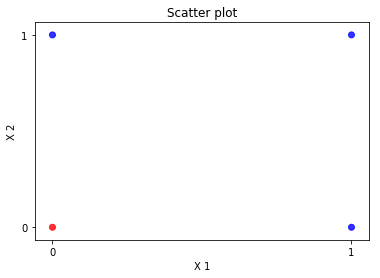

In [9]:
# This example is an implementation of OR gate

# Number of input neurons = 2
# Number of output neurons = 1

# Training input sample
X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

# Training output sample
Y = np.array([[0],[1],[1],[1]])

visualize(X,Y)

In [21]:
print('Before training')
size = initialize_sizes(X, Y)
print(size)

weights = initialize_parameter(size)
print('W1 = ', weights['W1'])
print('b1 = ', weights['b1'])
print('W2 = ', weights['W2'])
print('b2 = ', weights['b2'])


print('\n Training... \n')
result = forward_propagation(X, Y, weights)

print('After training')
print('A = ', result['A'])
print('W1 = ', result['W1'])
print('b1 = ', result['b1'])
print('W2 = ', result['W2'])
print('b2 = ', result['b2'])

Before training
{'n_x': 2, 'n_h': 3, 'n_y': 1}
W1 =  [[ 0.00817851 -0.01071794  0.01088154]
 [-0.01369053 -0.00877931  0.0091029 ]]
b1 =  [[-0.88509566 -0.17961688 -0.63969065]]
W2 =  [[0.00141283]
 [0.02213335]
 [0.01085596]]
b2 =  [[-1.52591725]]

 Training... 

After training
A =  [[0.]
 [1.]
 [1.]
 [1.]]
W1 =  [[0.45763851 0.43874206 0.46034154]
 [0.43576947 0.44068069 0.4585629 ]]
b1 =  [[-0.43563566  0.26984312 -0.19023065]]
W2 =  [[0.45087283]
 [0.47159335]
 [0.46031596]]
b2 =  [[-1.07645725]]


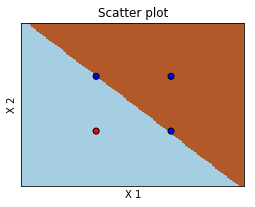

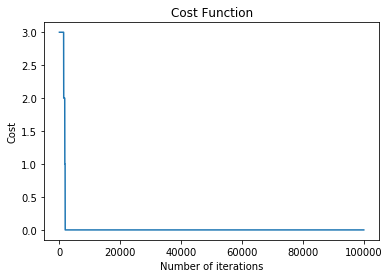

In [22]:
# Visualization of decision boundary and loss function
decision_boundary(X, Y, result)
plot_cost_function(result)

In [23]:
# Compute accuracy

accuracy = np.mean( result['A'].flatten() == Y.flatten() )

print(accuracy * 100)

100.0


# Implementation of XOR

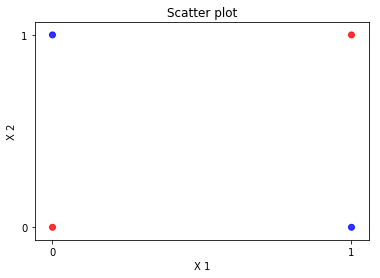

In [13]:
# This example is an implementation of XOR gate

# Number of input neurons = 2
# Number of output neurons = 1

# Training input sample
xor_X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

# Training output sample
xor_Y = np.array([[0],[1],[1],[0]])

visualize(xor_X, xor_Y)

In [14]:
print('Before training')
xor_size = initialize_sizes(xor_X, xor_Y)
print(xor_size)

xor_weights = initialize_parameter(xor_size)
print('W1 = ', xor_weights['W1'])
print('b1 = ', xor_weights['b1'])
print('W2 = ', xor_weights['W2'])
print('b2 = ', xor_weights['b2'])

print('\n Training... \n')
xor_result = forward_propagation(xor_X, xor_Y, xor_weights)

print('After training')
print('A = ', xor_result['A'])
print('W1 = ', xor_result['W1'])
print('b1 = ', xor_result['b1'])
print('W2 = ', xor_result['W2'])
print('b2 = ', xor_result['b2'])

Before training
{'n_x': 2, 'n_h': 3, 'n_y': 1}
W1 =  [[-0.01408711 -0.00402671 -0.00736355]
 [ 0.0059159  -0.02272599 -0.00607893]]
b1 =  [[ 0.45077007 -2.30699395  0.23055666]]
W2 =  [[0.0050412 ]
 [0.01042145]
 [0.01515621]]
b2 =  [[-0.68636596]]

 Training... 

After training
A =  [[0.]
 [0.]
 [0.]
 [0.]]
W1 =  [[0.20803289 0.21809329 0.21475645]
 [0.2280359  0.19939401 0.21604107]]
b1 =  [[ 0.67289007 -2.08487395  0.45267666]]
W2 =  [[0.2271612 ]
 [0.23254145]
 [0.23727621]]
b2 =  [[-0.46424596]]


In [15]:
# Compute accuracy

accuracy = np.mean( xor_result['A'].flatten() == xor_Y.flatten() )

print(accuracy * 100)

50.0


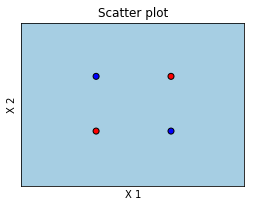

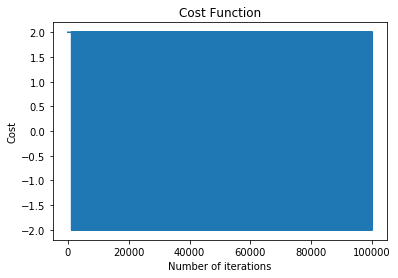

In [16]:
# Visualization of decision boundary and loss function
decision_boundary(xor_X, xor_Y, xor_result)
plot_cost_function(xor_result)